In [ ]:
# import pip
# pip.main(["install","kmodes"])

In [1]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

# Applying for a created dataset

In [2]:
hair_color = ['blonde', 'brunette', 'red', 'black', 'brunette', 'black', 'red', 'black']
eye_color = ['amber', 'gray', 'green', 'hazel', 'amber', 'gray', 'green', 'hazel']
skin_color = ['fair', 'brown', 'brown', 'brown', 'fair', 'brown', 'fair', 'fair']
person = ['P1','P2','P3','P4','P5','P6','P7','P8']
data = pd.DataFrame({'person':person, 'hair_color':hair_color, 'eye_color':eye_color, 'skin_color':skin_color},index=person)
data

,person,hair_color,eye_color,skin_color
P1,P1,blonde,amber,fair
P2,P2,brunette,gray,brown
P3,P3,red,green,brown
P4,P4,black,hazel,brown
P5,P5,brunette,amber,fair
P6,P6,black,gray,brown
P7,P7,red,green,fair
P8,P8,black,hazel,fair


# Creating K Modes object & fitting

In [5]:
kmo = KModes(n_clusters=3)

In [6]:
kmo.fit(data)

KModes(n_clusters=3)

# Clusters

In [7]:
kmo.labels_

array([1, 2, 0, 0, 1, 0, 1, 0], dtype=uint16)

In [8]:
data["Cluster"]=kmo.labels_

In [9]:
data

,person,hair_color,eye_color,skin_color,Cluster
P1,P1,blonde,amber,fair,1
P2,P2,brunette,gray,brown,2
P3,P3,red,green,brown,0
P4,P4,black,hazel,brown,0
P5,P5,brunette,amber,fair,1
P6,P6,black,gray,brown,0
P7,P7,red,green,fair,1
P8,P8,black,hazel,fair,0


# Measiring the cost

In [10]:
kmo.cost_

12.0

# Optimizing K

In [12]:
cost = []
K = range(1,8)
for k in list(K):
    model = KModes(n_clusters=k)
    model.fit(data)
    cost.append(model.cost_)

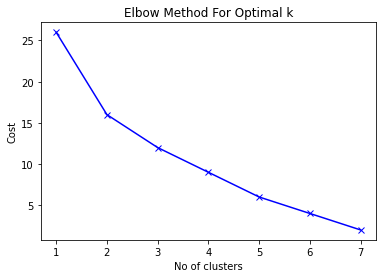

In [13]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

# Applying for real data

In [15]:
data=pd.read_csv("D:\\Workshops\\Machine Learning for Data Science & Artifcial Intelligence With Python\\data\\Living_Area.CSV")
data.head()

,ID,Gender,Living
0,2001,F,Rural
1,2002,M,Urban
2,2003,M,Urban
3,2004,F,Urban
4,2005,F,Urban


In [16]:
kmo = KModes(n_clusters=2)

In [17]:
kmo.fit(data)

KModes(n_clusters=2)

In [19]:
data["Cluster"]=kmo.labels_

In [21]:
data.head(20)

,ID,Gender,Living,Cluster
0,2001,F,Rural,0
1,2002,M,Urban,0
2,2003,M,Urban,0
3,2004,F,Urban,0
4,2005,F,Urban,0
5,2006,F,Rural,0
6,2007,M,Rural,1
7,2008,F,Urban,0
8,2009,F,Rural,0
9,2010,M,Rural,1
